In [3]:
# Import the modules
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import joblib



In [4]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv(
    Path('Resources/logistic_regression.csv')   
)

# Review the DataFrame
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


Data dictionary:

loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
term : The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate : Interest Rate on the loan
installment : The monthly payment owed by the borrower if the loan originates.
grade : LoanTap assigned loan grade
sub_grade : LoanTap assigned loan subgrade
emp_title :The job title supplied by the Borrower when applying for the loan.*
emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
annual_inc : The self-reported annual income provided by the borrower during registration.
verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
issue_d : The month which the loan was funded
loan_status : Current status of the loan - Target Variable
purpose : A category provided by the borrower for the loan request.
title : The loan title provided by the borrower
dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
earliest_cr_line :The month the borrower's earliest reported credit line was opened
open_acc : The number of open credit lines in the borrower's credit file.
pub_rec : Number of derogatory public records
revol_bal : Total credit revolving balance
revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
total_acc : The total number of credit lines currently in the borrower's credit file
initial_list_status : The initial listing status of the loan. Possible values are – W, F
application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
mort_acc : Number of mortgage accounts.
pub_rec_bankruptcies : Number of public record bankruptcies
Address: Address of the individual

In [5]:
#drop columns that are not relevant to our analysis
clean_df = df.drop(columns =['verification_status','emp_title','sub_grade','title','address','issue_d','pub_rec','earliest_cr_line'])
clean_df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,dti,open_acc,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36 months,11.44,329.48,B,10+ years,RENT,117000.0,Fully Paid,vacation,26.24,16.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0
1,8000.0,36 months,11.99,265.68,B,4 years,MORTGAGE,65000.0,Fully Paid,debt_consolidation,22.05,17.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0
2,15600.0,36 months,10.49,506.97,B,< 1 year,RENT,43057.0,Fully Paid,credit_card,12.79,13.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0
3,7200.0,36 months,6.49,220.65,A,6 years,RENT,54000.0,Fully Paid,credit_card,2.60,6.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0
4,24375.0,60 months,17.27,609.33,C,9 years,MORTGAGE,55000.0,Charged Off,credit_card,33.95,13.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0


In [6]:
#Deleting rows with null values
columns_to_check = ['revol_util', 'mort_acc','pub_rec_bankruptcies','emp_length']
clean_df.dropna(subset=columns_to_check, inplace=True)


In [7]:
#Store the dataframe in sqlite
from sqlalchemy import create_engine
engine = create_engine('sqlite:///SQL/Loan_analysis_data.db')
clean_df.to_sql('Loan_data', con=engine, index=False)

ValueError: Table 'Loan_data' already exists.

In [8]:
clean_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'loan_status', 'purpose', 'dti',
       'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

array([[<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'int_rate'}>,
        <Axes: title={'center': 'installment'}>],
       [<Axes: title={'center': 'annual_inc'}>,
        <Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'open_acc'}>],
       [<Axes: title={'center': 'revol_bal'}>,
        <Axes: title={'center': 'revol_util'}>,
        <Axes: title={'center': 'total_acc'}>],
       [<Axes: title={'center': 'mort_acc'}>,
        <Axes: title={'center': 'pub_rec_bankruptcies'}>, <Axes: >]],
      dtype=object)

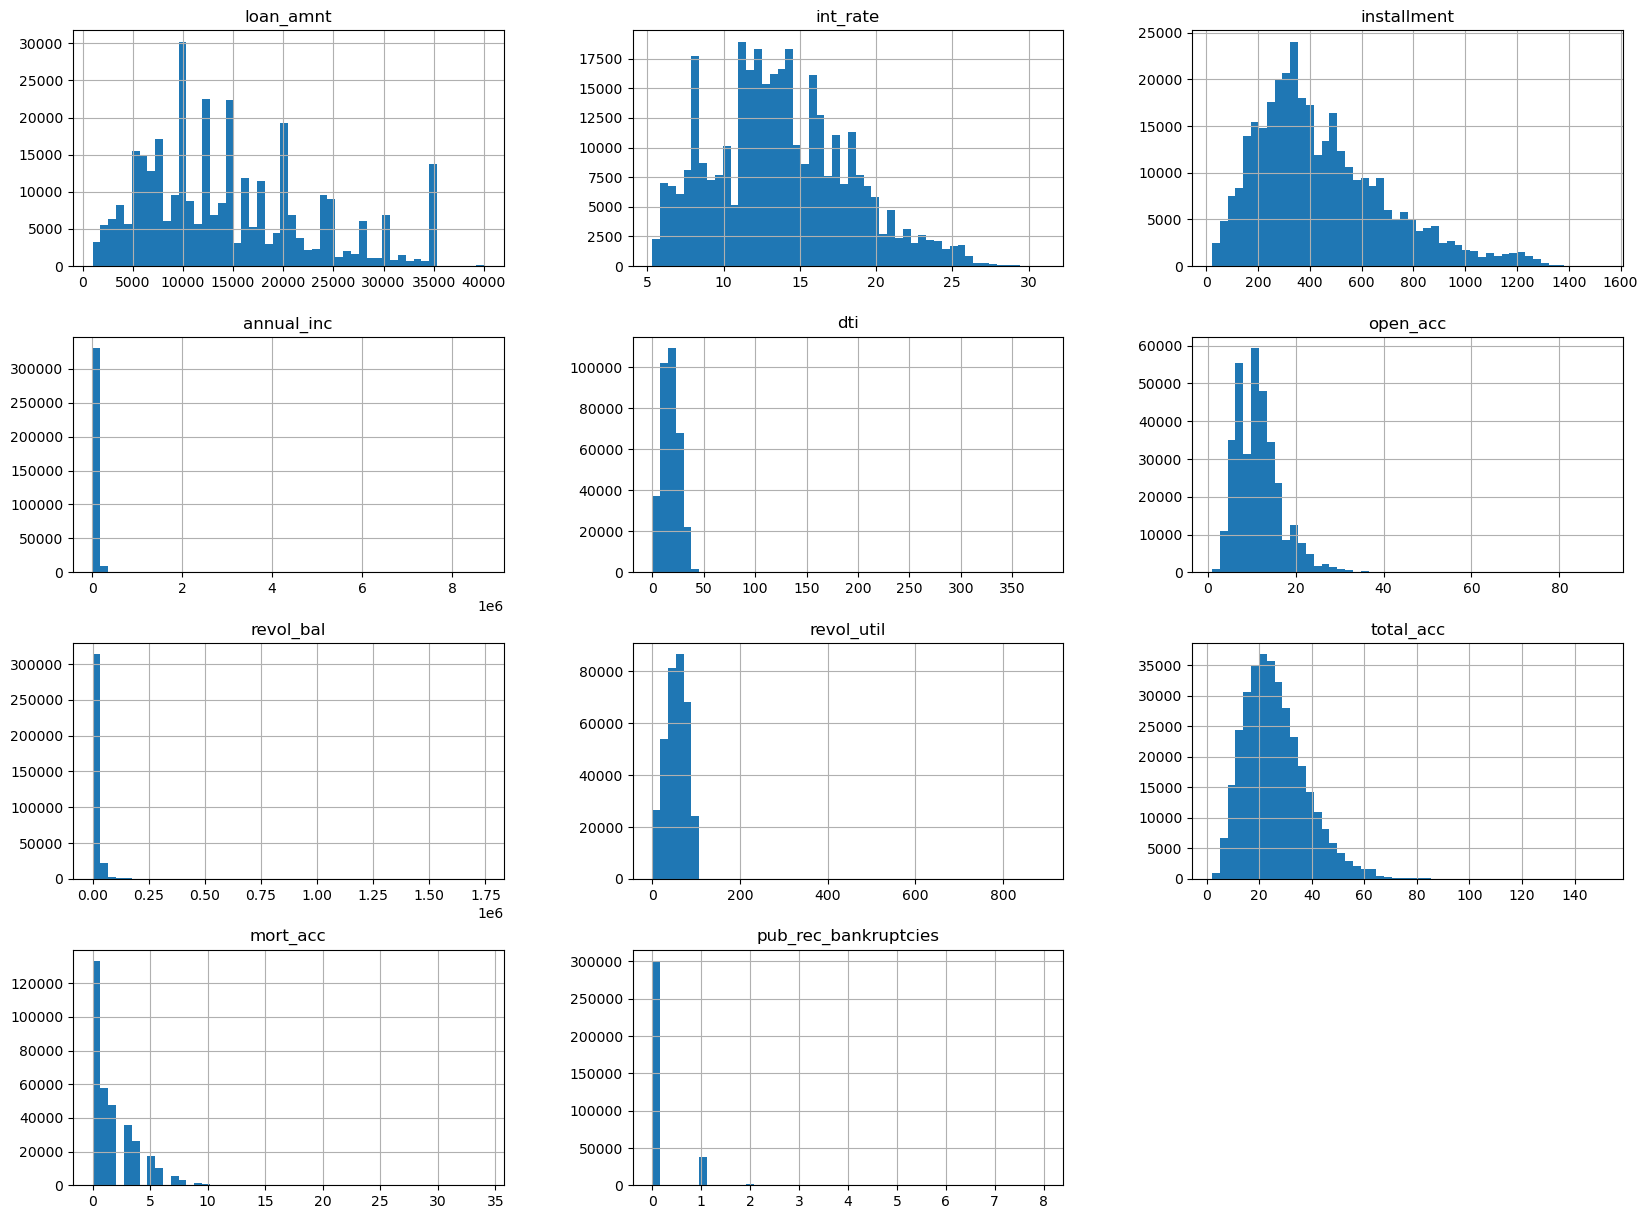

In [9]:
clean_df.hist(bins=50, figsize=(20,15))

In [10]:
corr = clean_df.corr(numeric_only=True) # data frame correlation function
print(corr)

                      loan_amnt  int_rate  installment  annual_inc       dti  \
loan_amnt              1.000000  0.152622     0.954508    0.335103  0.024622   
int_rate               0.152622  1.000000     0.144676   -0.071185  0.164928   
installment            0.954508  0.144676     1.000000    0.328977  0.018636   
annual_inc             0.335103 -0.071185     0.328977    1.000000 -0.188195   
dti                    0.024622  0.164928     0.018636   -0.188195  1.000000   
open_acc               0.183001 -0.001154     0.170536    0.126052  0.294096   
revol_bal              0.325574 -0.021718     0.313158    0.300403  0.131930   
revol_util             0.096004  0.272088     0.118196    0.024580  0.181232   
total_acc              0.211157 -0.045558     0.187977    0.185068  0.219933   
mort_acc               0.223917 -0.081044     0.194498    0.239101 -0.058146   
pub_rec_bankruptcies  -0.113050  0.049408    -0.106674   -0.048838 -0.047126   

                      open_acc  revol_b

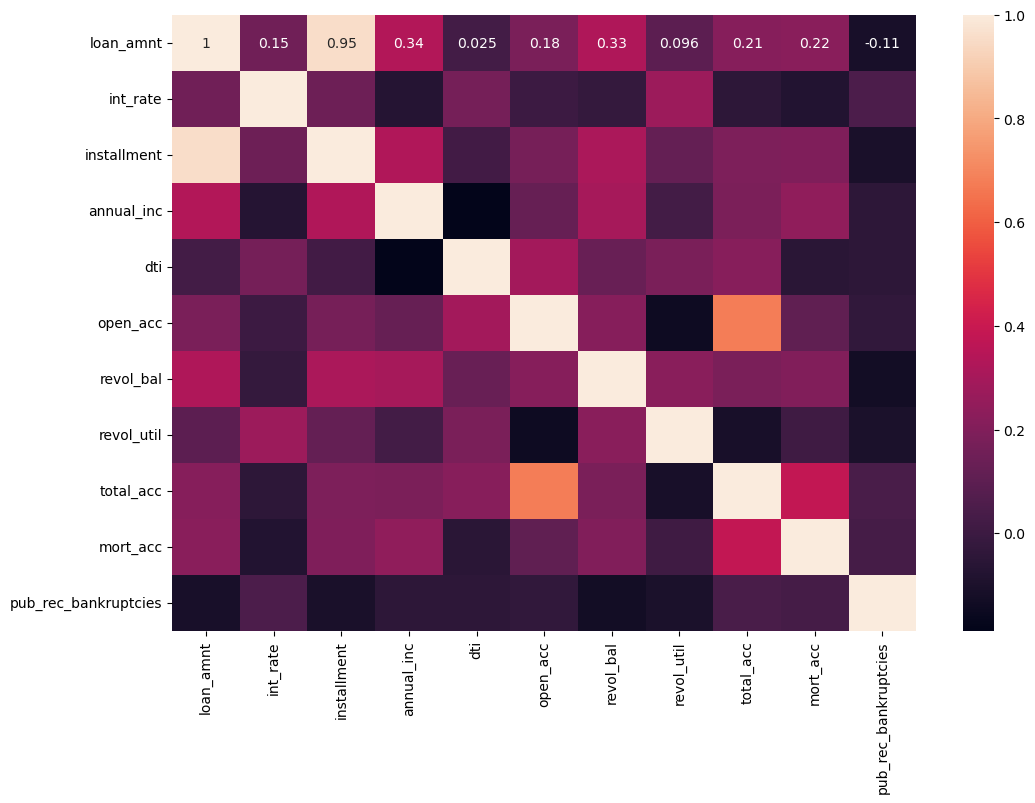

In [11]:
# make the heatmap larger in size
plt.figure(figsize = (12,8))

sns.heatmap(corr, annot=True)
plt.show()

In [12]:
# Additionally we noted that loan_amnt have high correlation with installment, 
# so it's interesting to find out if removal of one of them would have any affect on the model performance

#  a new feature that is a ratio of the loan amount to installments
clean_df.drop(columns=['installment'],inplace=True)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340775 entries, 0 to 396028
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             340775 non-null  float64
 1   term                  340775 non-null  object 
 2   int_rate              340775 non-null  float64
 3   grade                 340775 non-null  object 
 4   emp_length            340775 non-null  object 
 5   home_ownership        340775 non-null  object 
 6   annual_inc            340775 non-null  float64
 7   loan_status           340775 non-null  object 
 8   purpose               340775 non-null  object 
 9   dti                   340775 non-null  float64
 10  open_acc              340775 non-null  float64
 11  revol_bal             340775 non-null  float64
 12  revol_util            340775 non-null  float64
 13  total_acc             340775 non-null  float64
 14  initial_list_status   340775 non-null  object 
 15  appli

In [13]:
corr = clean_df.corr(numeric_only=True) # data frame correlation function
print(corr)

                      loan_amnt  int_rate  annual_inc       dti  open_acc  \
loan_amnt              1.000000  0.152622    0.335103  0.024622  0.183001   
int_rate               0.152622  1.000000   -0.071185  0.164928 -0.001154   
annual_inc             0.335103 -0.071185    1.000000 -0.188195  0.126052   
dti                    0.024622  0.164928   -0.188195  1.000000  0.294096   
open_acc               0.183001 -0.001154    0.126052  0.294096  1.000000   
revol_bal              0.325574 -0.021718    0.300403  0.131930  0.212018   
revol_util             0.096004  0.272088    0.024580  0.181232 -0.144050   
total_acc              0.211157 -0.045558    0.185068  0.219933  0.678426   
mort_acc               0.223917 -0.081044    0.239101 -0.058146  0.107838   
pub_rec_bankruptcies  -0.113050  0.049408   -0.048838 -0.047126 -0.034791   

                      revol_bal  revol_util  total_acc  mort_acc  \
loan_amnt              0.325574    0.096004   0.211157  0.223917   
int_rate        

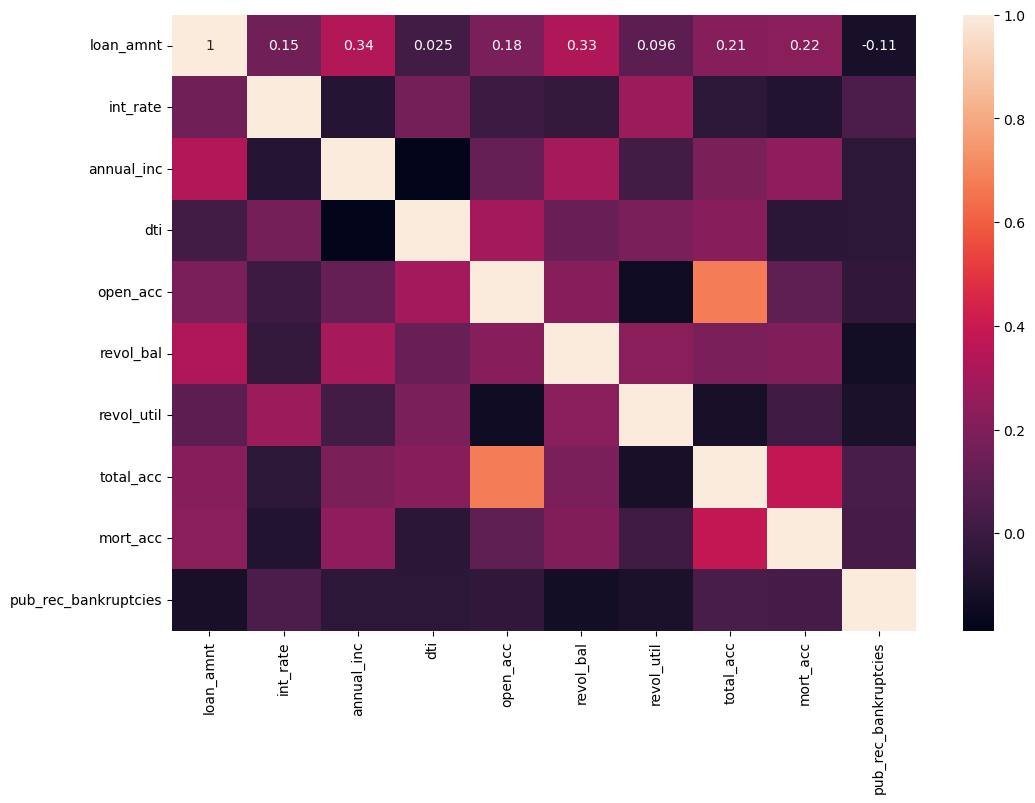

In [14]:
# make the heatmap larger in size
plt.figure(figsize = (12,8))

sns.heatmap(corr, annot=True)
plt.show()

In [15]:
numerical_data=clean_df.select_dtypes(include='number')
num_cols=numerical_data.columns
len(num_cols)

10

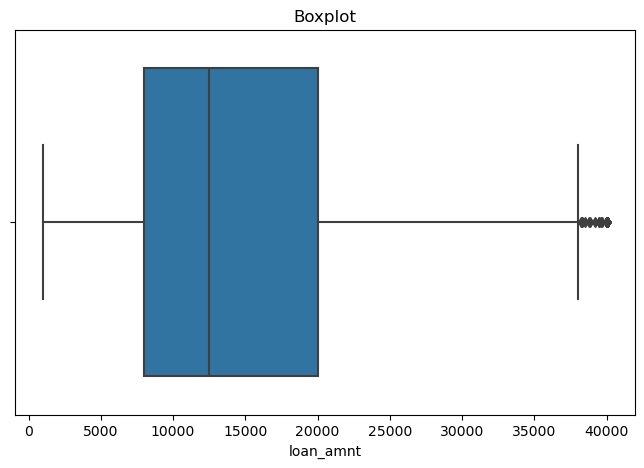

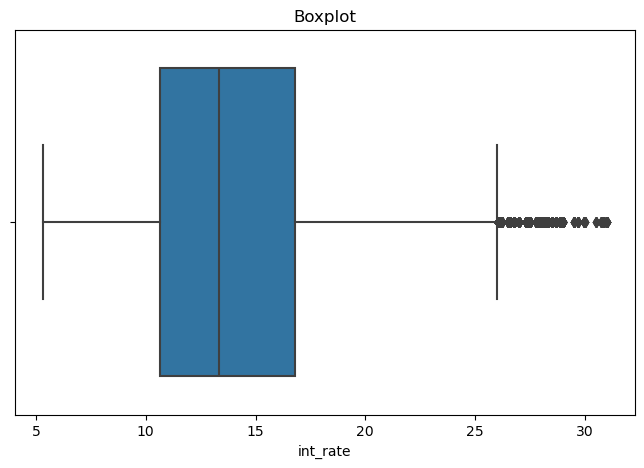

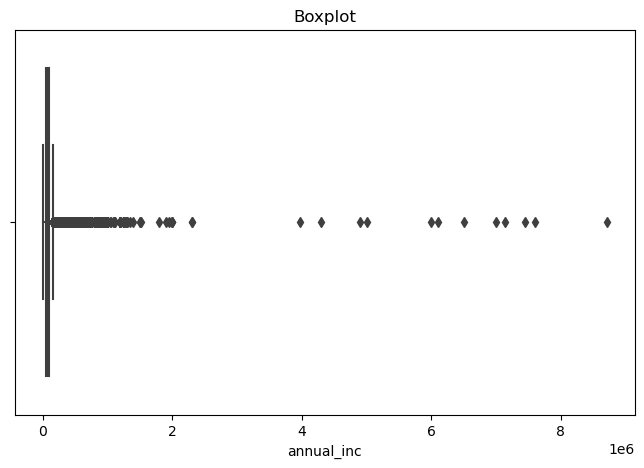

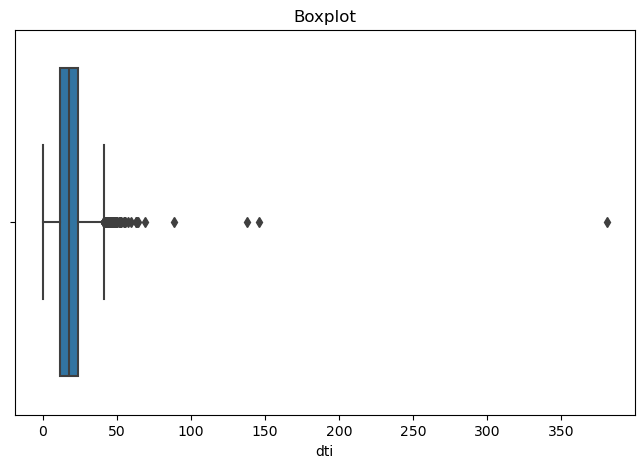

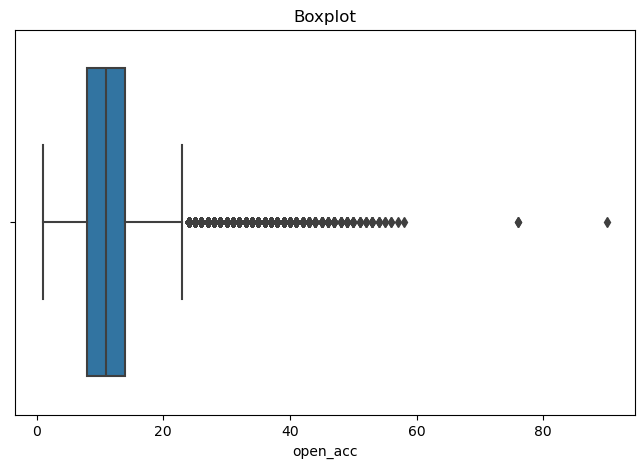

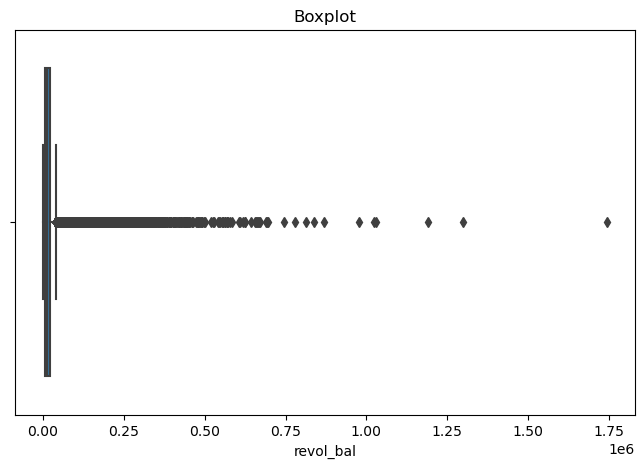

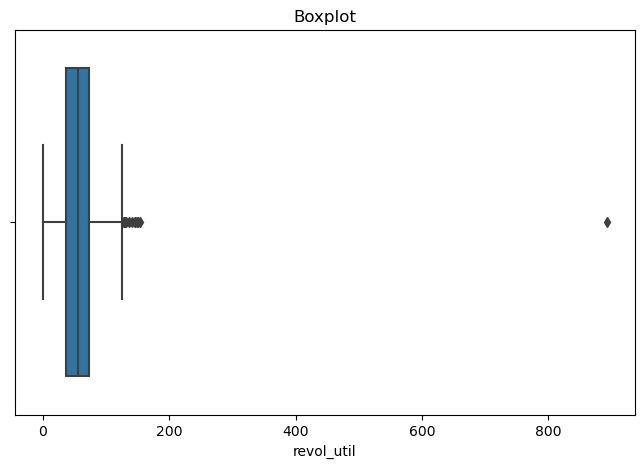

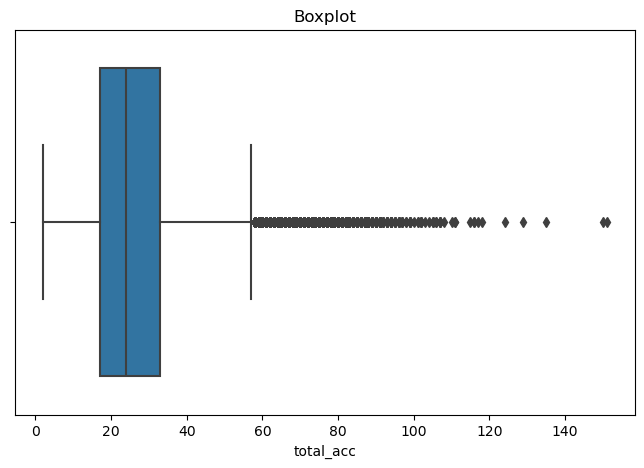

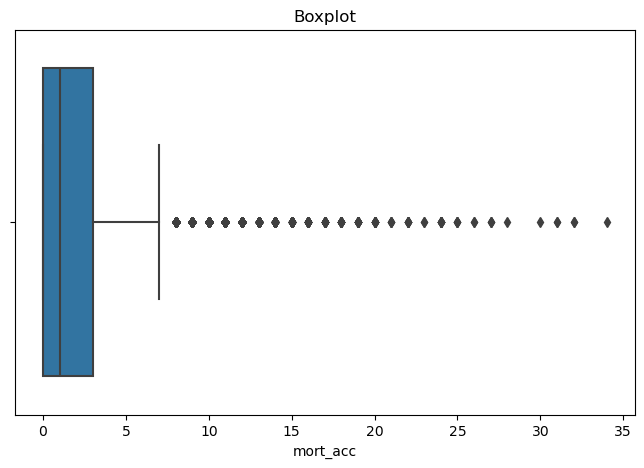

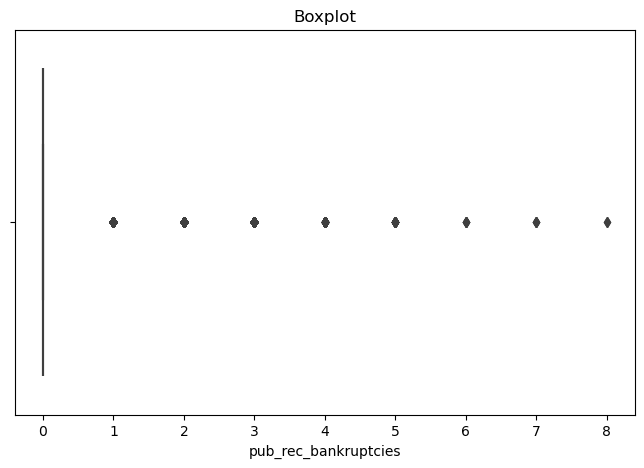

In [16]:
def box_plot(col):
    plt.figure(figsize=(8,5))
    sns.boxplot(x=clean_df[col])
    plt.title('Boxplot')
    plt.show()
    
for col in num_cols:
    box_plot(col)

In [17]:
# Remove outliers
for col in num_cols:
    mean=clean_df[col].mean()
    std=clean_df[col].std()
    
    upper_limit=mean+3*std
    lower_limit=mean-3*std
    
    clean_df=clean_df[(clean_df[col]<upper_limit) & (clean_df[col]>lower_limit)]
    
clean_df.shape

(321290, 18)

In [18]:
#change the value of initial_list_status to 0 and 1, it has only two values w and f
clean_df['initial_list_status'] = clean_df['initial_list_status'].replace({'w': 0, 'f': 1})

In [19]:
#if the loan was paid the value is changed to 1 if the loan was charged off the value is changed to 0
clean_df['loan_status'] = clean_df['loan_status'].replace({'Fully Paid': 1, 'Charged Off': 0})

In [20]:
clean_df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,loan_status,purpose,dti,open_acc,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36 months,11.44,B,10+ years,RENT,117000.0,1,vacation,26.24,16.0,36369.0,41.8,25.0,0,INDIVIDUAL,0.0,0.0
1,8000.0,36 months,11.99,B,4 years,MORTGAGE,65000.0,1,debt_consolidation,22.05,17.0,20131.0,53.3,27.0,1,INDIVIDUAL,3.0,0.0
2,15600.0,36 months,10.49,B,< 1 year,RENT,43057.0,1,credit_card,12.79,13.0,11987.0,92.2,26.0,1,INDIVIDUAL,0.0,0.0
3,7200.0,36 months,6.49,A,6 years,RENT,54000.0,1,credit_card,2.60,6.0,5472.0,21.5,13.0,1,INDIVIDUAL,0.0,0.0
4,24375.0,60 months,17.27,C,9 years,MORTGAGE,55000.0,0,credit_card,33.95,13.0,24584.0,69.8,43.0,1,INDIVIDUAL,1.0,0.0


In [21]:
# Convert categorical data to numeric with `pd.get_dummies`
categorical_columns =["term","grade","emp_length","home_ownership","purpose","application_type"]

df_dummies = pd.get_dummies(clean_df[categorical_columns])

# Merge the encoded columns back to the original DataFrame
clean_df = pd.concat([clean_df, df_dummies], axis=1)

# Drop the original categorical
clean_df.drop(categorical_columns, axis=1, inplace=True)


In [22]:
clean_df.head()

,loan_amnt,int_rate,annual_inc,loan_status,dti,open_acc,revol_bal,revol_util,total_acc,initial_list_status,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT
0,10000.0,11.44,117000.0,1,26.24,16.0,36369.0,41.8,25.0,0,...,False,False,False,False,False,True,False,False,True,False
1,8000.0,11.99,65000.0,1,22.05,17.0,20131.0,53.3,27.0,1,...,False,False,False,False,False,False,False,False,True,False
2,15600.0,10.49,43057.0,1,12.79,13.0,11987.0,92.2,26.0,1,...,False,False,False,False,False,False,False,False,True,False
3,7200.0,6.49,54000.0,1,2.60,6.0,5472.0,21.5,13.0,1,...,False,False,False,False,False,False,False,False,True,False
4,24375.0,17.27,55000.0,0,33.95,13.0,24584.0,69.8,43.0,1,...,False,False,False,False,False,False,False,False,True,False


In [23]:
# Split our preprocessed data into our features and target arrays

y = clean_df["loan_status"].values
feature_names = clean_df.drop(columns=["loan_status"]).columns
X = clean_df.drop(columns=["loan_status"]).values

# Split the preprocessed data into a training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, stratify=y, random_state=78)

# Confirm how the data was split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(257032, 53)
(64258, 53)
(257032,)
(64258,)


In [24]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=78)

# Fit the model using training data
lr_model = logistic_regression_model.fit(X_train_scaled, y_train)

In [26]:
# Make a prediction using the testing data
testing_predictions = logistic_regression_model.predict(X_test_scaled)

In [27]:
# Generate a confusion matrix for the model
testing_matrix = confusion_matrix(y_test, testing_predictions)

In [29]:
# Model evaluation 
cm = confusion_matrix(y_test, testing_predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, testing_predictions)

In [30]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, testing_predictions))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,828,11915
Actual 1,677,50838


Accuracy Score : 0.8040399638955461
Classification Report
              precision    recall  f1-score   support

           0       0.55      0.06      0.12     12743
           1       0.81      0.99      0.89     51515

    accuracy                           0.80     64258
   macro avg       0.68      0.53      0.50     64258
weighted avg       0.76      0.80      0.74     64258



In [31]:
# Instantiate the Logistic Regression model
logistic_regression_model2 = LogisticRegression(random_state=78, class_weight="balanced")

# Fit the model using training data
lr_model2 = logistic_regression_model2.fit(X_train_scaled, y_train)

In [32]:
# Make a prediction using the testing data
testing_predictions2 = logistic_regression_model2.predict(X_test_scaled)

# Generate a confusion matrix for the model
testing_matrix2 = confusion_matrix(y_test, testing_predictions2)

In [33]:
# Model evaluation 
cm2 = confusion_matrix(y_test, testing_predictions2)
cm_df2 = pd.DataFrame(
    cm2, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
from sklearn.metrics import accuracy_score
acc_score2 = accuracy_score(y_test, testing_predictions2)

In [34]:
# Displaying results
print("Confusion Matrix")
display(cm_df2)
print(f"Accuracy Score : {acc_score2}")
print("Classification Report")
print(classification_report(y_test, testing_predictions2))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,8486,4257
Actual 1,18516,32999


Accuracy Score : 0.6456005477917146
Classification Report
              precision    recall  f1-score   support

           0       0.31      0.67      0.43     12743
           1       0.89      0.64      0.74     51515

    accuracy                           0.65     64258
   macro avg       0.60      0.65      0.59     64258
weighted avg       0.77      0.65      0.68     64258



In [35]:
# Fitting the Decision Tree Model 
from sklearn import tree
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [36]:
model = model.fit(X_train_scaled, y_train)

In [37]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)


In [38]:
# Calculating the confusion matrix
cm3 = confusion_matrix(y_test, predictions)
cm_df3 = pd.DataFrame(
    cm3, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score3 = accuracy_score(y_test, predictions)


In [39]:
# Displaying results
print("Confusion Matrix")
display(cm_df3)
print(f"Accuracy Score : {acc_score3}")
print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,3731,9012
Actual 1,10089,41426


Accuracy Score : 0.7027451834790999
Classification Report
              precision    recall  f1-score   support

           0       0.27      0.29      0.28     12743
           1       0.82      0.80      0.81     51515

    accuracy                           0.70     64258
   macro avg       0.55      0.55      0.55     64258
weighted avg       0.71      0.70      0.71     64258



In [40]:
#decision 2 model 2 with weighted 
model2 = tree.DecisionTreeClassifier(class_weight="balanced")
model2 = model2.fit(X_train_scaled, y_train)
# Making predictions using the testing data
predictions2 = model2.predict(X_test_scaled)

In [41]:
# Calculating the confusion matrix
cm4 = confusion_matrix(y_test, predictions2)
cm_df4 = pd.DataFrame(
    cm4, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score4 = accuracy_score(y_test, predictions2)


In [42]:
# Displaying results
print("Confusion Matrix")
display(cm_df4)
print(f"Accuracy Score : {acc_score4}")
print("Classification Report")
print(classification_report(y_test, predictions2))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,3533,9210
Actual 1,9473,42042


Accuracy Score : 0.7092502100905724
Classification Report
              precision    recall  f1-score   support

           0       0.27      0.28      0.27     12743
           1       0.82      0.82      0.82     51515

    accuracy                           0.71     64258
   macro avg       0.55      0.55      0.55     64258
weighted avg       0.71      0.71      0.71     64258



In [52]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=78)

In [53]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [ ]:
# Assume 'model' is your trained model
joblib.dump(rf_model, 'model.joblib')

In [54]:
# Making predictions using the testing data
rf_predictions = rf_model.predict(X_test_scaled)

In [55]:
# Calculating the confusion matrix
rfcm = confusion_matrix(y_test, rf_predictions)
rfcm_df = pd.DataFrame(
    rfcm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
rfacc_score = accuracy_score(y_test, rf_predictions)

In [56]:
# Displaying results
print("Confusion Matrix")
display(rfcm_df)
print(f"Accuracy Score : {rfacc_score}")
print("Classification Report")
print(classification_report(y_test, rf_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,878,11865
Actual 1,770,50745


Accuracy Score : 0.8033707865168539
Classification Report
              precision    recall  f1-score   support

           0       0.53      0.07      0.12     12743
           1       0.81      0.99      0.89     51515

    accuracy                           0.80     64258
   macro avg       0.67      0.53      0.51     64258
weighted avg       0.76      0.80      0.74     64258



In [57]:
X_train_df = pd.DataFrame(X_train, columns=feature_names)

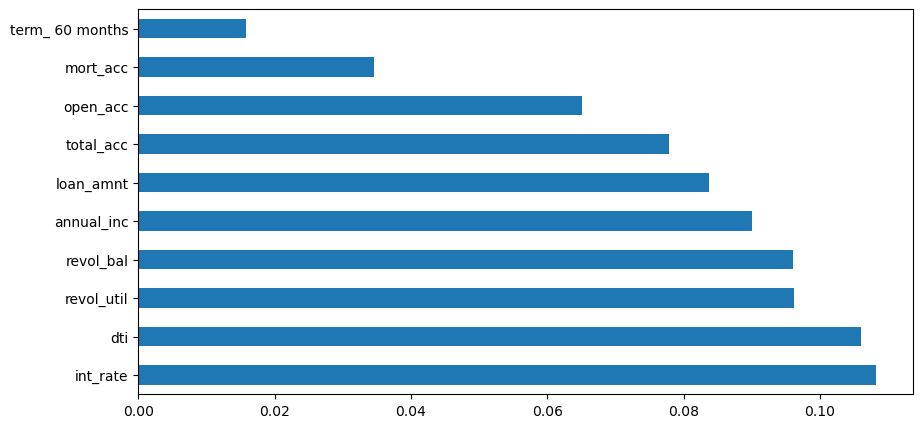

In [58]:
# Determine feature importance - random forest algorithm is that it gives you the ‘feature importance’ for all the variables in the data
# plot the 10 most important features 
plt.figure(figsize=(10,5))
feat_importances = pd.Series(rf_model.feature_importances_, index = X_train_df.columns)
feat_importances.nlargest(10).plot(kind='barh');

In [59]:
from xgboost import XGBClassifier
# Calculate the scale_pos_weight
# scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Train with class weight adjustment using scaled data
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss') #, scale_pos_weight=scale_pos_weight
xgb_model.fit(X_train_scaled, y_train)

# Predict and evaluate again
y_pred = xgb_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8038
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.10      0.17     12743
           1       0.81      0.98      0.89     51515

    accuracy                           0.80     64258
   macro avg       0.67      0.54      0.53     64258
weighted avg       0.76      0.80      0.75     64258



In [60]:
# DF with important features
clean_df2=clean_df[['mort_acc', 'open_acc', 'total_acc', 'loan_amnt', 'annual_inc', 'revol_bal', 'revol_util', 'dti', 'int_rate', 'loan_status']]
clean_df2.head()

,mort_acc,open_acc,total_acc,loan_amnt,annual_inc,revol_bal,revol_util,dti,int_rate,loan_status
0,0.0,16.0,25.0,10000.0,117000.0,36369.0,41.8,26.24,11.44,1
1,3.0,17.0,27.0,8000.0,65000.0,20131.0,53.3,22.05,11.99,1
2,0.0,13.0,26.0,15600.0,43057.0,11987.0,92.2,12.79,10.49,1
3,0.0,6.0,13.0,7200.0,54000.0,5472.0,21.5,2.60,6.49,1
4,1.0,13.0,43.0,24375.0,55000.0,24584.0,69.8,33.95,17.27,0


In [61]:
from sklearn.model_selection import train_test_split
y = clean_df2["loan_status"].values
X = clean_df2.drop(columns=["loan_status"]).values

# Split the preprocessed data into a training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=78)

# Confirm how the data was split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(257032, 9)
(64258, 9)
(257032,)
(64258,)


In [62]:
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss') #, scale_pos_weight=scale_pos_weight
xgb_model.fit(X_train, y_train)

# Predict and evaluate again
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8030
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.08      0.14     12743
           1       0.81      0.98      0.89     51515

    accuracy                           0.80     64258
   macro avg       0.67      0.53      0.51     64258
weighted avg       0.75      0.80      0.74     64258



In [43]:
# Neural Network using Keras
# Import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [44]:
# Define the Sequential model
model = Sequential()

# Add input layer with the number of features as input_dim
model.add(Dense(units=100, activation='relu', input_dim=X_train_scaled.shape[1]))

# Add hidden layers
model.add(Dense(units=50, activation='relu'))

# Add output layer (1 unit for binary classification)
model.add(Dense(units=1, activation='sigmoid'))


/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [46]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
6426/6426 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8000 - loss: 0.4639 - val_accuracy: 0.8037 - val_loss: 0.4556
Epoch 2/10
6426/6426 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8048 - loss: 0.4529 - val_accuracy: 0.8022 - val_loss: 0.4545
Epoch 3/10
6426/6426 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8058 - loss: 0.4475 - val_accuracy: 0.8010 - val_loss: 0.4533
Epoch 4/10
6426/6426 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8053 - loss: 0.4497 - val_accuracy: 0.8023 - val_loss: 0.4528
Epoch 5/10
6426/6426 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8064 - loss: 0.4457 - val_accuracy: 0.8026 - val_loss: 0.4520
Epoch 6/10
6426/6426 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8051 - loss: 0.4469 - val_accuracy: 0.8021 - val_loss: 0.4530
Epoch 7/10
6426/6426 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8068 - loss: 0.4463 - val_accuracy: 0.8009 - val_loss: 0.4529
Epoch 8/10
6426/6426 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8091 - loss: 0

In [47]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy}")


2009/2009 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8044 - loss: 0.4517
Test Accuracy: 0.8036198019981384


In [48]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy}")


2009/2009 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8044 - loss: 0.4517
Test Accuracy: 0.8036198019981384


In [49]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy}")


2009/2009 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8044 - loss: 0.4517
Test Accuracy: 0.8036198019981384
